In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
class GaborFilter:
    def gabor_filter(self, K, s, g, l, p, theta):
        k = K//2
        G = np.zeros((K, K), dtype=np.float32)
        rad = theta * np.pi / 180.0
        for i in range(K):
            for j in range(K):
                y, x = i-k, j-k
                xx = np.cos(rad)*x + np.sin(rad)*y
                yy = -np.sin(rad)*x + np.cos(rad)*y
                G[i, j] = np.exp(-(xx**2+(g**2)*(yy**2))/ (2*(s**2))) * np.cos(2*np.pi*xx/l + p)
        return G / np.sum(np.abs(G))
    
    def normalize_val255(self, G):
        H = G - np.min(G)
        return (H / H.max() * 255).astype(np.uint8)

In [16]:
class Solver:
    def __init__(self):
        self.filter = GaborFilter()
        
    def problem_77(self):
        f = self.filter.gabor_filter(K=111, s=10, g=1.2, l=10, p=0, theta=0)
        f = self.filter.normalize_val255(f)
        return f

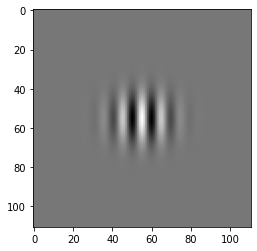

In [17]:
solver = Solver()
output_img = solver.problem_77()
plt.imshow(output_img, cmap="gray")
plt.show()